# Example notebook

This tutorial demonstrates how to access an NWB file from the [Mah et al. 2023]((https://doi.org/10.1038/s41467-023-43250-x)) dataset using `pynwb`.

The dataset from [“Distinct value computations support rapid sequential decisions”](https://doi.org/10.1038/s41467-023-43250-x) includes behavioral data from rats performing various decision-making tasks, collected using a Bpod system (Bpod State Machine r2, Sanworks).

The behavioral task and data is stored using the [ndx-structured-behavior](https://github.com/rly/ndx-structured-behavior) extension for NWB.

## Overview of NWB

This schematic shows an overview of the data types added to NWB. 

![NWB mapping](../mah_2024_uml.png)


## Reading an NWB file

This section demonstrates how to access an NWB file using `pynwb.NWBHDF5IO`.


In [5]:
from pynwb import NWBHDF5IO
import ndx_structured_behavior

nwbfile_path = "/Volumes/T9/Constantinople/nwbfiles/C005_RWTautowait_20190909_1456292.nwb"

io = NWBHDF5IO(nwbfile_path, "r")
nwbfile = io.read()
nwbfile

,timestamp,event_type,value
id,,,
0,18321.2148,3,In
1,18321.2733,3,In
2,18388.1032,3,In
3,18392.6948,3,In
,start_time,stop_time,state_type
id,,,
0,17950.0907,18390.3721,0
1,18390.3721,18391.2413,1
2,18391.2413,18391.2433,2


## Accessing the task metadata

The task-related general metadata is stored in a `Task` object which can be accessed as `nwbfile.lab_meta_data["task"]`.

The `EventTypesTable` is a column-based table to store the type of events that occur during the task (e.g. port poke from the animal), one type per row.
This table can be accessed as `nwbfile.lab_meta_data["task"].event_types`.


In [19]:
nwbfile.lab_meta_data["task"].event_types[:]

,event_name
id,
0,state_timer
1,left_port_poke
2,center_port_poke
3,right_port_poke


The `ActionTypesTable` is a column-based table to store the type of actions that occur during the task (e.g. sound output from the acquisition system), one type per row.
This table can be accessed as `nwbfile.lab_meta_data["task"].action_types`.

In [21]:
nwbfile.lab_meta_data["task"].action_types[:]

,action_name
id,
0,sound_output


The `StateTypesTable` is a column-based table to store the type of states that occur during the task (e.g. while the animal is waiting for reward), one type per row.
This table can be accessed as `nwbfile.lab_meta_data["task"].state_types`.

In [22]:
nwbfile.lab_meta_data["task"].state_types[:]

,state_name
id,
0,wait_for_poke
1,nose_in_center
2,go_cue
3,wait_for_side_poke
4,announce_reward
5,reward
6,punish_violation
7,opt_out


The arguments for the task is stored in a `TaskArgumentsTable` which can be accessed as `nwbfile.lab_meta_data["task"].task_arguments`.


In [23]:
nwbfile.lab_meta_data["task"].task_arguments[:]

,argument_name,argument_description,expression,expression_type,output_type
id,,,,,
0,reward_volume_ul,The volume of reward in microliters.,20,integer,numeric
1,nose_in_center,The time in seconds when the animal is require...,0.8692142692974026,double,numeric
2,time_increment_for_nose_in_center,The time increment for nose in center in seconds.,0,double,numeric
3,target_duration_for_nose_in_center,The goal for how long the animal must poke cen...,1,double,numeric
4,training_stage,The stage of the training.,9,integer,numeric
5,delay_to_reward,The delay in seconds from the end of NoseInCen...,4.135626626614768,double,numeric
6,target_delay_to_reward,The target delay in seconds from the end of No...,1.5,double,numeric
7,time_increment_for_delay_to_reward,The time increment during monotonic increase o...,0.025,double,numeric
8,violation_time_out,The time-out if nose is center is not satisfie...,2,double,numeric


## Accessing the behavioral data

The `TaskRecording` object stores the data for events, states, and actions that occured during the task. The `TaskRecording` is added as acquisition which can be accessed as `nwbfile.acquisition["task_recording"]`.

The `EventsTable` is a column-based table to store the information about the events (e.g. poke times), one event per row. This table can be accessed as `nwbfile.acquisition["task_recording"].events`.

In [67]:
import pandas as pd

pd.merge(
    nwbfile.acquisition["task_recording"].events[:],
    nwbfile.lab_meta_data["task"].event_types[:],
    left_on="event_type",
    right_on="id",
)

,timestamp,event_type,value,event_name
0,18321.2148,3,In,right_port_poke
1,18321.2733,3,In,right_port_poke
2,18388.1032,3,In,right_port_poke
3,18392.6948,3,In,right_port_poke
4,18392.8286,3,In,right_port_poke
...,...,...,...,...
9940,24398.9252,3,Out,right_port_poke
9941,24401.8246,3,Out,right_port_poke
9942,24406.3278,3,Out,right_port_poke
9943,24406.3543,3,Out,right_port_poke


The `ActionsTable` is a column-based table to store the information about the actions (e.g. sound onset times), one action per row. This table can be accessed as `nwbfile.acquisition["task_recording"].actions`.

In [71]:
pd.merge(
    nwbfile.acquisition["task_recording"].actions[:],
    nwbfile.lab_meta_data["task"].action_types[:],
    left_on="action_type",
    right_on="id",
).head()

,timestamp,action_type,value,action_name
0,17950.0908,0,On,sound_output
1,17950.0909,0,On,sound_output
2,18391.2434,0,On,sound_output
3,18391.2435,0,On,sound_output
4,18390.3722,0,On,sound_output


The `StatesTable` is a column-based table to store the information about the states (e.g. the duration while nose is in center port). This table can be accessed as `nwbfile.acquisition["task_recording"].states`.

In [74]:
pd.merge(
    nwbfile.acquisition["task_recording"].states[:],
    nwbfile.lab_meta_data["task"].state_types[:],
    left_on="state_type",
    right_on="id",
).head()

,start_time,stop_time,state_type,state_name
0,17950.0907,18390.3721,0,wait_for_poke
1,18390.3721,18391.2413,1,nose_in_center
2,18391.2413,18391.2433,2,go_cue
3,18391.2433,18395.3789,3,wait_for_side_poke
4,18395.3789,18395.4743,4,announce_reward


### Plot the events, actions, and states

The ``plot_events``, ``plot_actions``, and ``plot_states`` functions can consume both the raw table as well as a subset of the table as a pandas DataFrame created through slicing, e.g., via ``events[:100]`` will plot only the first 100 rows from the events table.


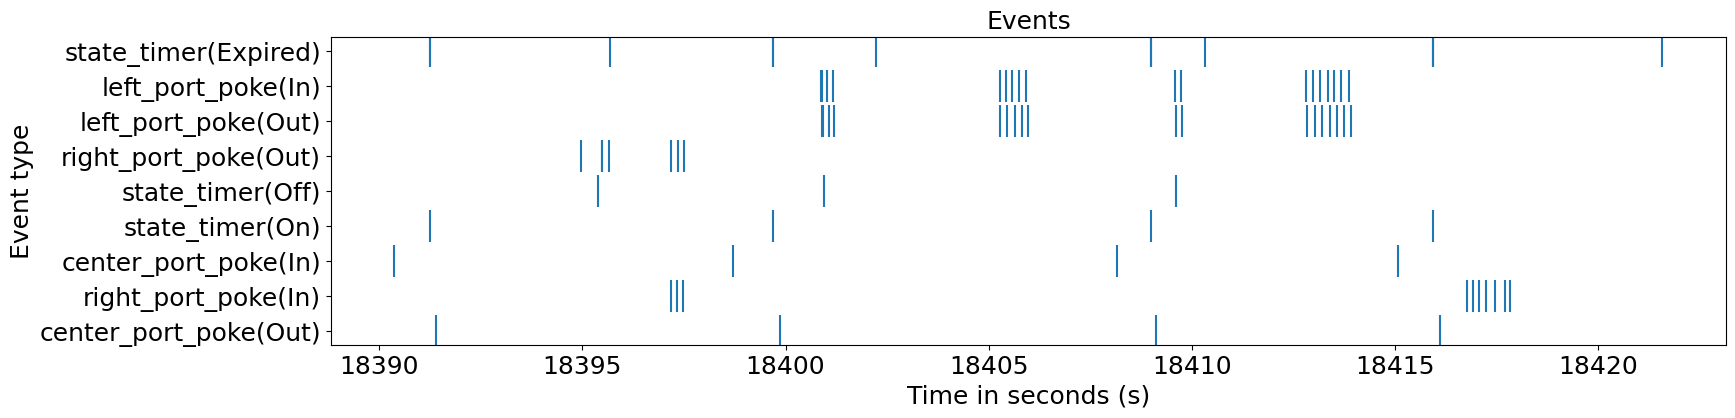

In [88]:
from matplotlib import pyplot as plt
from ndx_structured_behavior.plot import plot_events, plot_actions, plot_states, plot_trials

# Get the events from file
events = nwbfile.get_acquisition("task_recording").events
event_types = nwbfile.get_lab_meta_data("task").event_types

# Plot the data
fig = plot_events(
    events=events[20:100],
    event_types=event_types,
    show_event_values=True,
    figsize=(18,4),
    marker_size=500,
)
plt.title("Events", fontsize=18)
plt.show()

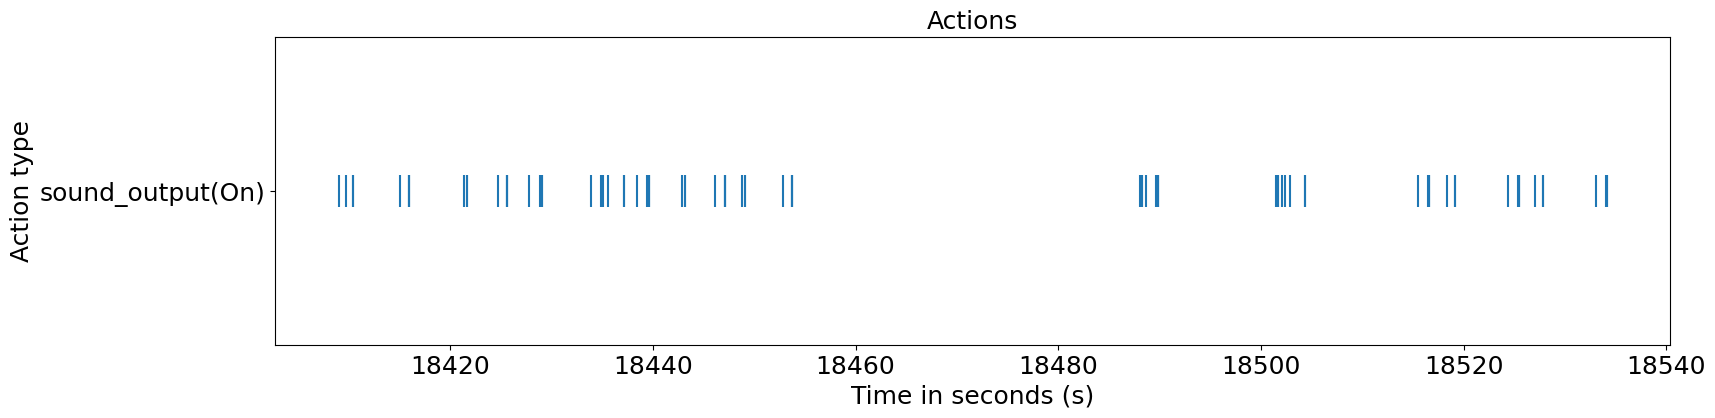

In [89]:
# Get the actions from file
actions = nwbfile.get_acquisition("task_recording").actions
action_types = nwbfile.get_lab_meta_data("task").action_types

# Plot the data
fig = plot_actions(
    actions=actions[20:100],
    action_types=action_types,
    figsize=(18,4),
    marker_size=500,
)
plt.title("Actions", fontsize=18)
plt.show()

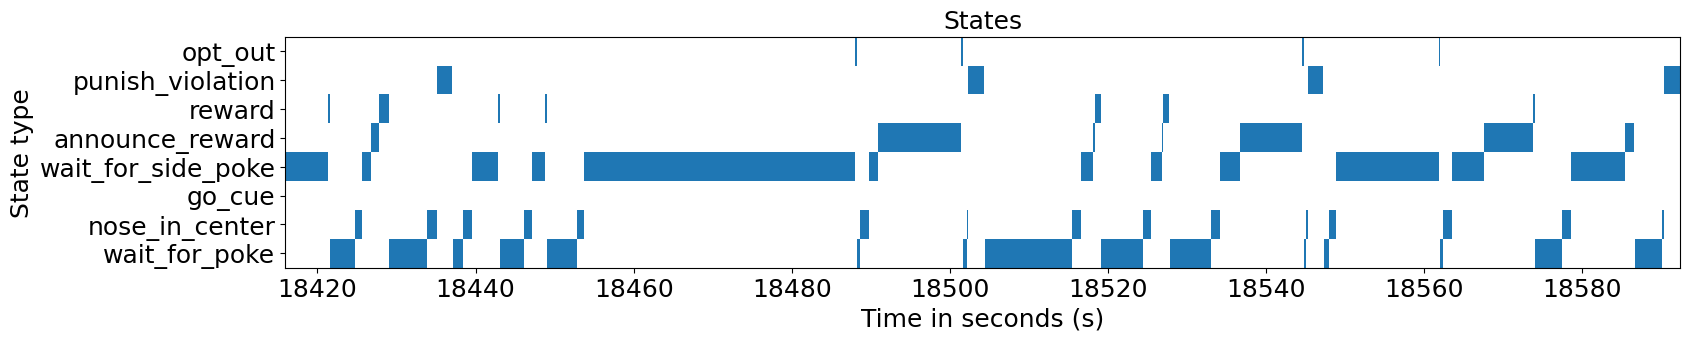

In [90]:
# Get the states from file
states = nwbfile.get_acquisition("task_recording").states
state_types = nwbfile.get_lab_meta_data("task").state_types

# Plot the data
plot_states(states=states[20:100],
            state_types=state_types,
            marker_size=500)
plt.title("States", fontsize=18)
plt.show()

## Accessing the trials

The `TrialsTable` is a column-based table to store information about trials, one trial per row.
The table can be accessed from the file as `nwbfile.trials`.


In [99]:
trials = nwbfile.trials
trials

,start_time,stop_time,states,events,actions,reward_volume_ul,previous_was_violation,is_warm_up,catch_percentage,changed,time_increment_for_delay_to_reward,training_stage,cumulative_reward_volume_ul,punish_sound_enabled,auto_change_catch_probability,nose_in_center,block_type,target_delay_to_reward,trials_in_stage,is_catch,delay_to_reward,target_duration_for_nose_in_center,violation_time_out,time_increment_for_nose_in_center
id,,,,,,,,,,,,,,,,,,,,,,,,
0,17950.0907,18395.7043,"[0, 1, 2, 3, 4, 5]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]","[0, 1, 2, 3, 4, 5, 6]",20,False,False,0.15,False,0.025,9,0,True,False,0.869210,High,1.5,23023,False,4.135600,1,2,0
1,18395.7043,18402.2559,"[6, 7, 8, 9, 10, 11]","[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]","[7, 8, 9, 10, 11, 12, 13, 14]",80,False,False,0.15,False,0.025,9,20,True,False,0.979292,High,1.5,23025,False,1.264520,1,2,0
2,18402.2559,18410.3677,"[12, 13, 14, 15, 16, 17]","[52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]","[15, 16, 17, 18, 19, 20, 21]",40,False,False,0.15,False,0.025,9,100,True,False,0.835958,High,1.5,23026,False,0.619385,1,2,0
3,18410.3677,18421.6165,"[18, 19, 20, 21, 22, 23]","[73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]","[22, 23, 24, 25, 26, 27, 28]",20,False,False,0.15,False,0.025,9,140,True,False,0.846073,High,1.5,23027,False,5.369254,1,2,0


In [100]:
trials[:].head()

,start_time,stop_time,states,events,actions,reward_volume_ul,previous_was_violation,is_warm_up,catch_percentage,changed,...,auto_change_catch_probability,nose_in_center,block_type,target_delay_to_reward,trials_in_stage,is_catch,delay_to_reward,target_duration_for_nose_in_center,violation_time_out,time_increment_for_nose_in_center
id,,,,,,,,,,,,,,,,,,,,,
0,17950.0907,18395.7043,"[0, 1, 2, 3, 4, 5]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 1, 2, 3, 4, 5, 6]",20,False,False,0.15,False,...,False,0.869210,High,1.5,23023,False,4.135600,1,2,0
1,18395.7043,18402.2559,"[6, 7, 8, 9, 10, 11]","[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...","[7, 8, 9, 10, 11, 12, 13, 14]",80,False,False,0.15,False,...,False,0.979292,High,1.5,23025,False,1.264520,1,2,0
2,18402.2559,18410.3677,"[12, 13, 14, 15, 16, 17]","[52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 6...","[15, 16, 17, 18, 19, 20, 21]",40,False,False,0.15,False,...,False,0.835958,High,1.5,23026,False,0.619385,1,2,0
3,18410.3677,18421.6165,"[18, 19, 20, 21, 22, 23]","[73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 8...","[22, 23, 24, 25, 26, 27, 28]",20,False,False,0.15,False,...,False,0.846073,High,1.5,23027,False,5.369254,1,2,0
4,18421.6165,18429.0515,"[24, 25, 26, 27, 28, 29]","[132, 133, 134, 135, 136, 137, 138, 139, 140, ...","[29, 30, 31, 32, 33, 34, 35, 36]",80,False,False,0.15,False,...,False,0.838370,High,1.5,23028,False,1.220980,1,2,0


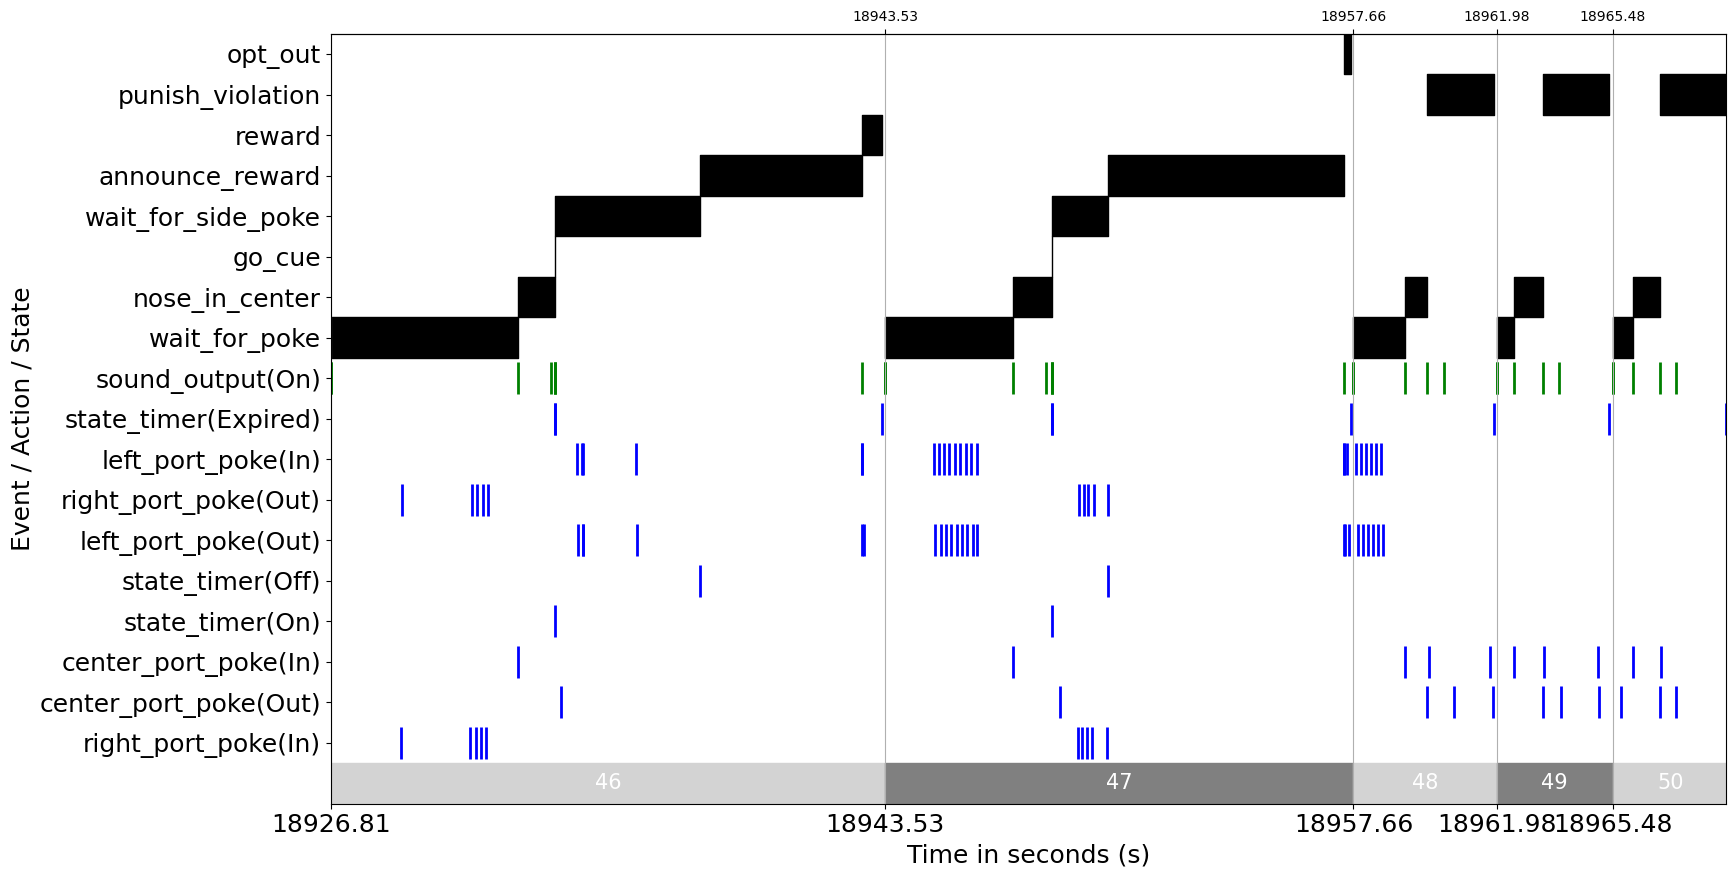

In [109]:
# Plot trial 46 - 50
plot_trials(
    trials=trials[46:51],
    states=states, state_types=state_types,
    actions=actions, action_types=action_types,
    events=events, event_types=event_types,
    figsize=None,
    fontsize=18,
    rectangle_height=1,
    marker_size=500)
plt.show()